### CRISP - DM Method
+ Barry - Business Understanding
+ Drove - Data Understanding
+ Directly to the - Data prep
+ Medical - Modelling
+ Emergency - Evaluation
+ Department - Deployment

# 1.Business Understanding
+ Forcasting
+ 3 years worth data
+ Adviced quality of data is okay
+ likely Regression

# 2.Data Undersatnding

In [7]:
import pandas as pd

In [8]:
df =pd.read_csv("regression.csv")

In [9]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [10]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [12]:
for col in df.columns:
    print(col, len(df[col].unique()),df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [13]:
 df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [14]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

# Visualize

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

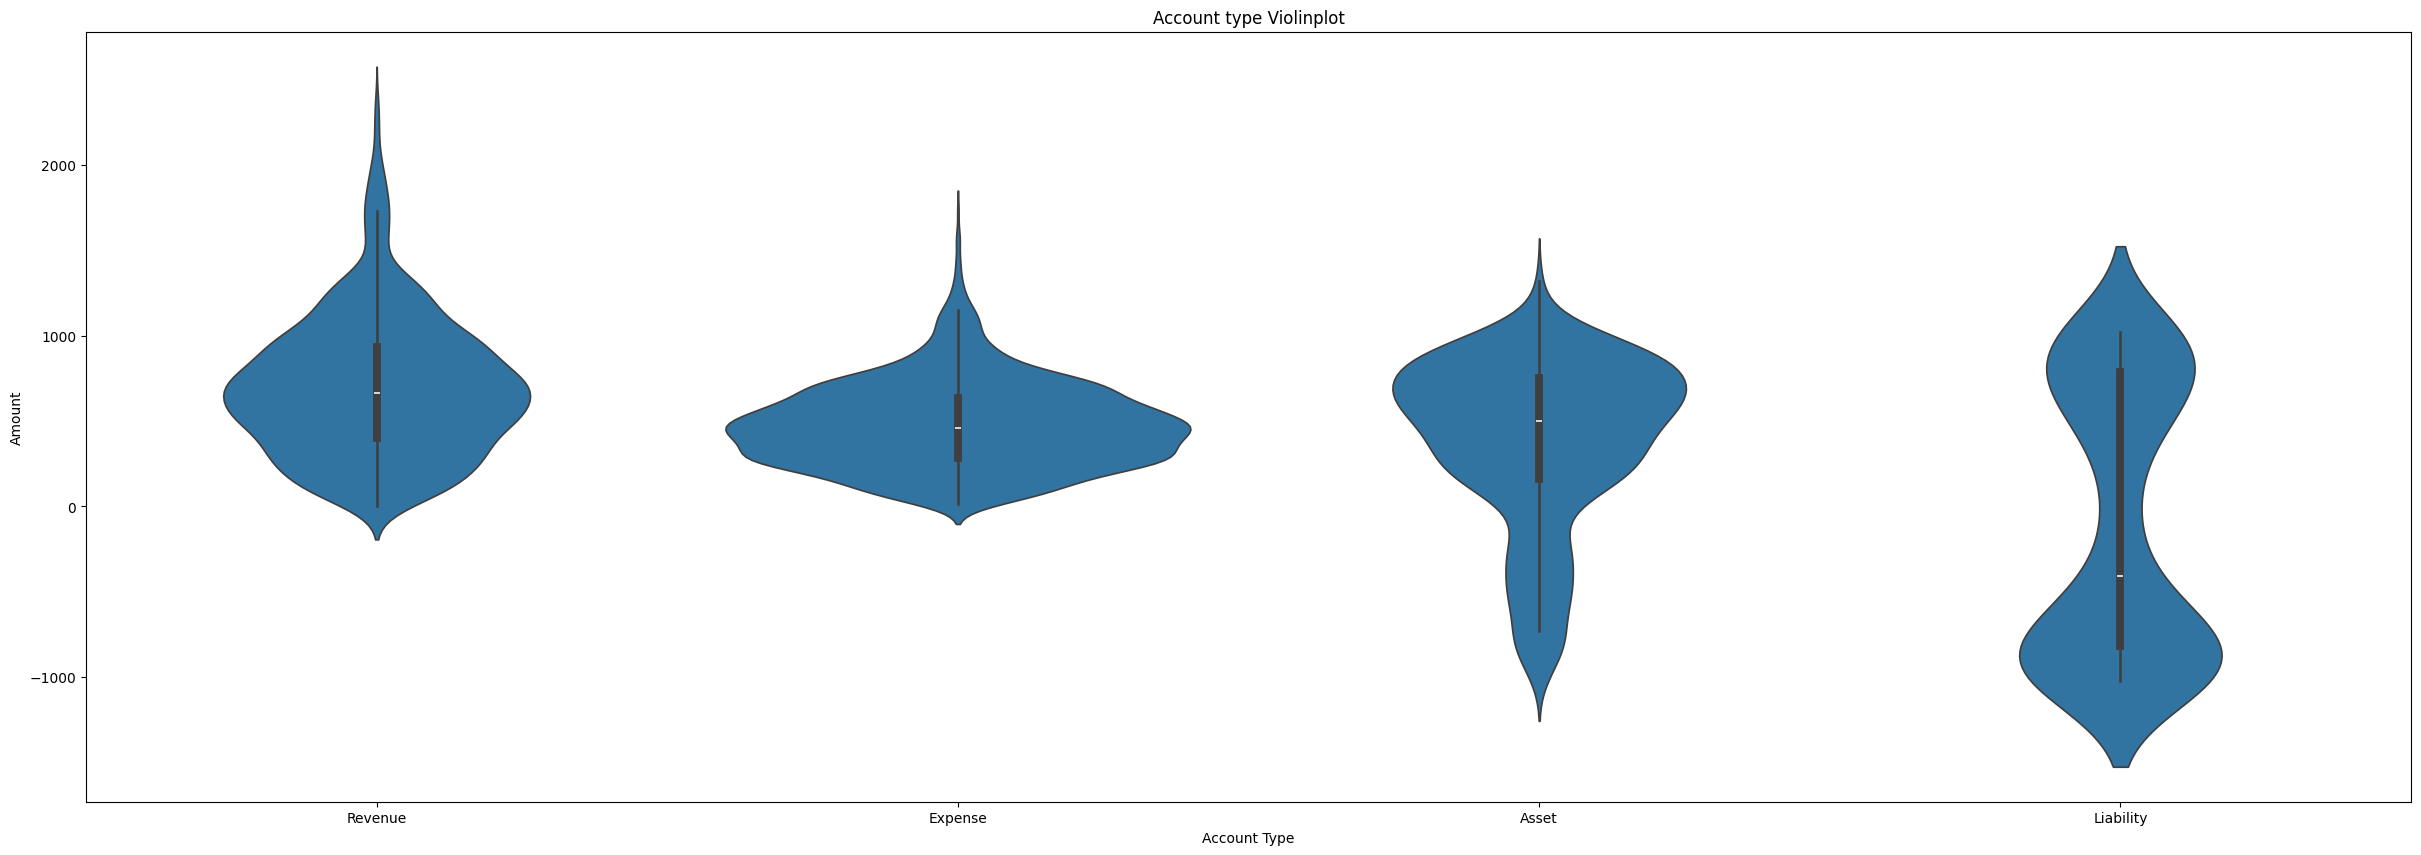

In [16]:
plt.figure(figsize=(30,10))
sns.violinplot(x = "Account Type",y = "Amount" , data = df).set_title("Account type Violinplot")
plt.show()

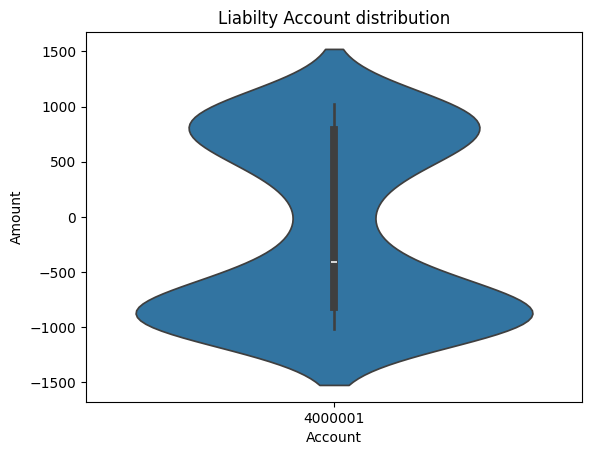

In [17]:
sns.violinplot(x = "Account",y = "Amount",data = df[df["Account Type"] == "Liability"]).set_title("Liabilty Account distribution")
plt.show()

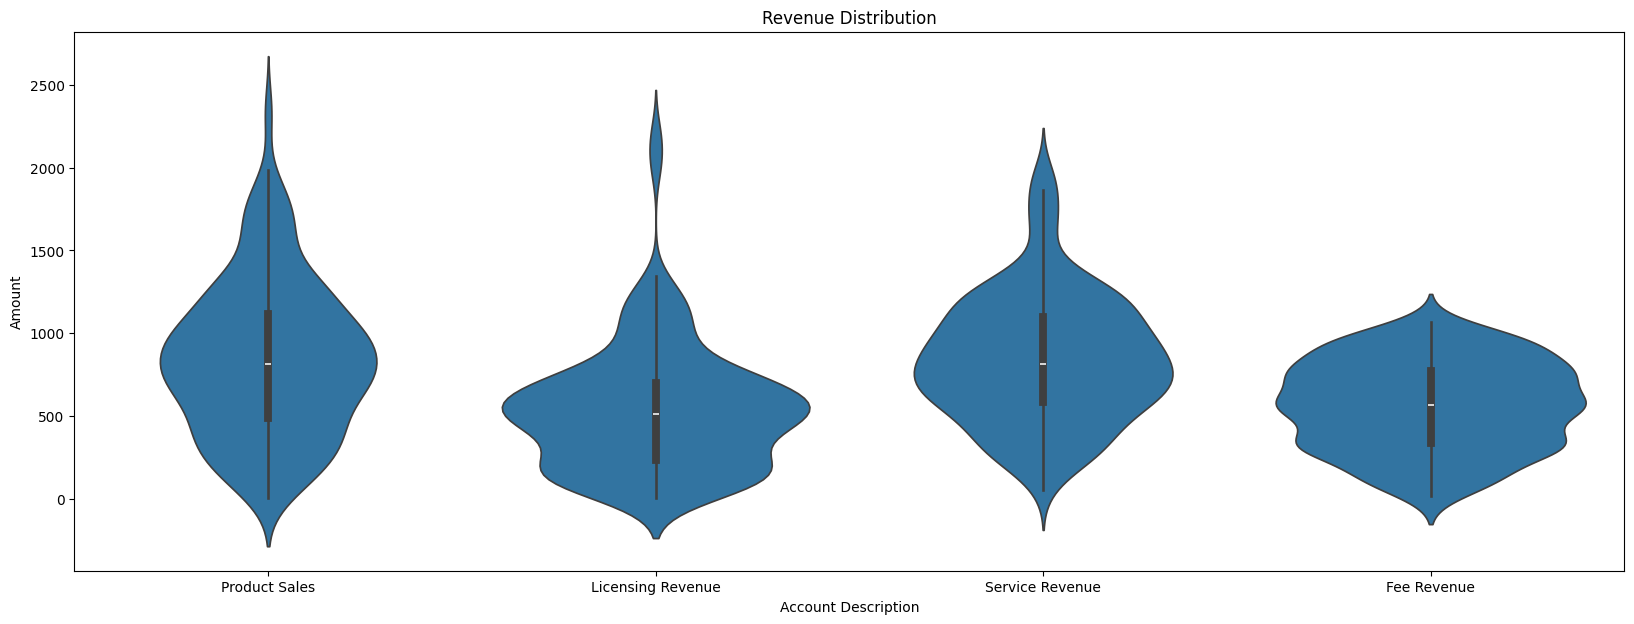

In [18]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Account Description",y="Amount",data=df[df["Account Type"]=="Revenue"]).set_title("Revenue Distribution")
plt.show()

# Data Trends

In [19]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [20]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

In [21]:
monthmap["Jan"]

1

In [22]:
df["Period"] = df["Month"].apply(lambda x : monthmap[x] )

In [23]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1


In [24]:
df["Period"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [25]:
df["Day"]=1

In [26]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1


In [27]:
df["Date"] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [28]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [29]:
df["Date"] = pd.to_datetime(df["Date"])

In [30]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

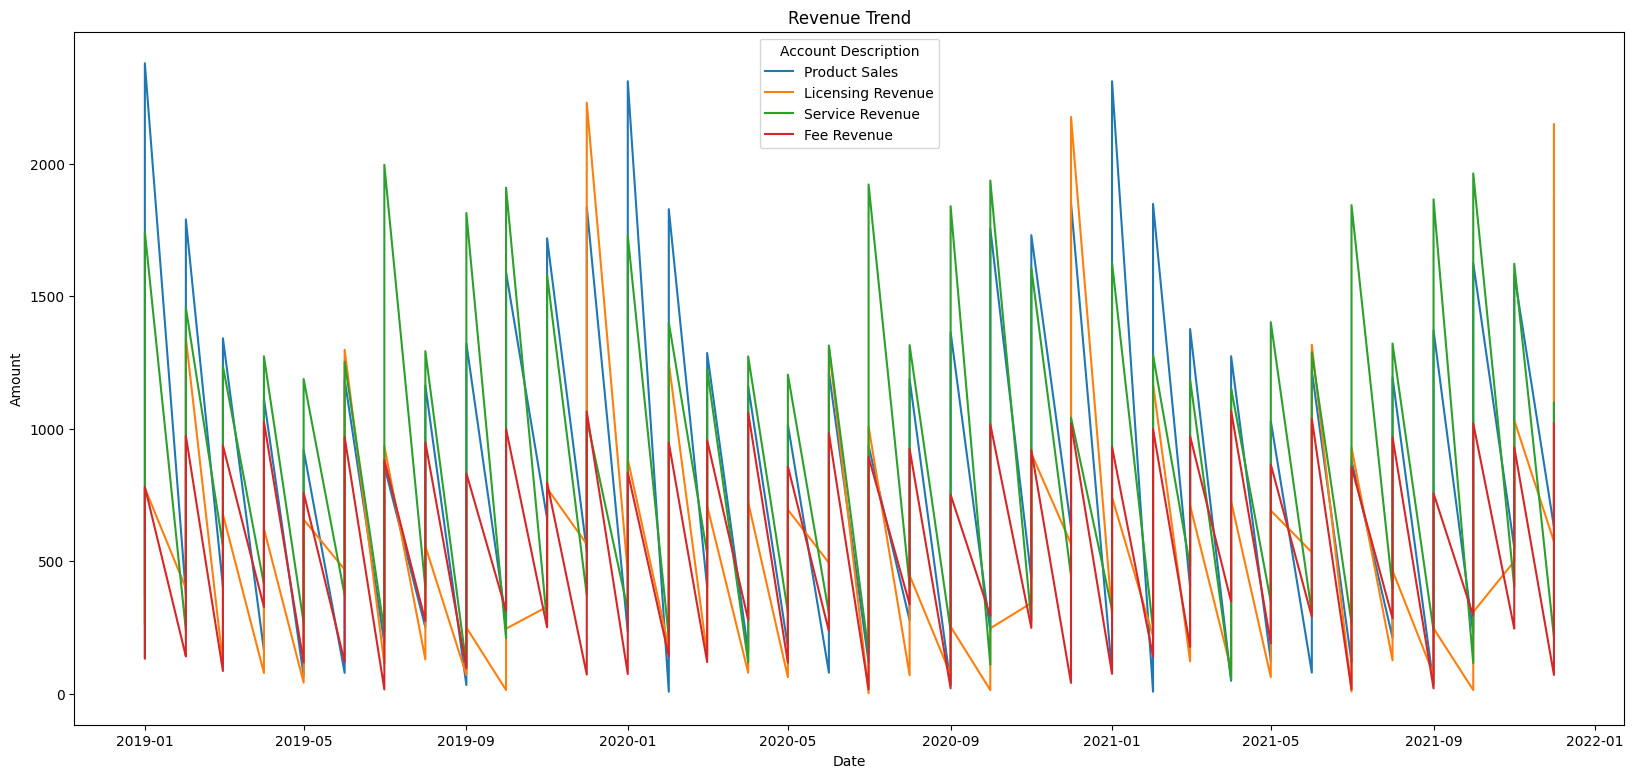

In [31]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date",y="Amount",hue = "Account Description",estimator = None,data=df[df["Account Type"]=="Revenue"]).set_title("Revenue Trend")
plt.show()

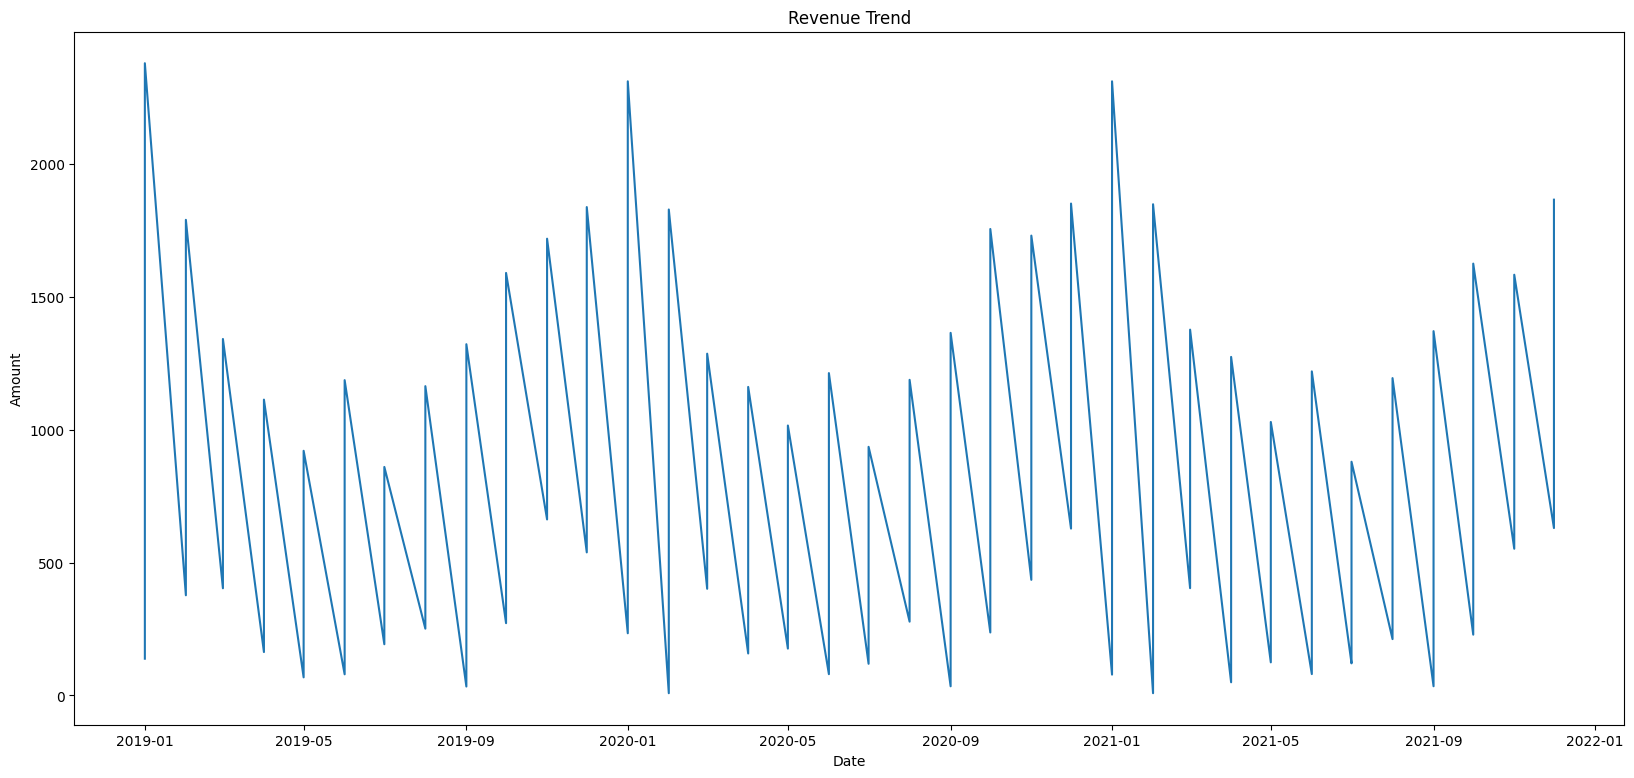

In [32]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date",y="Amount",estimator = None,data=df[df["Account Description"]=="Product Sales"]).set_title("Revenue Trend")
plt.show()

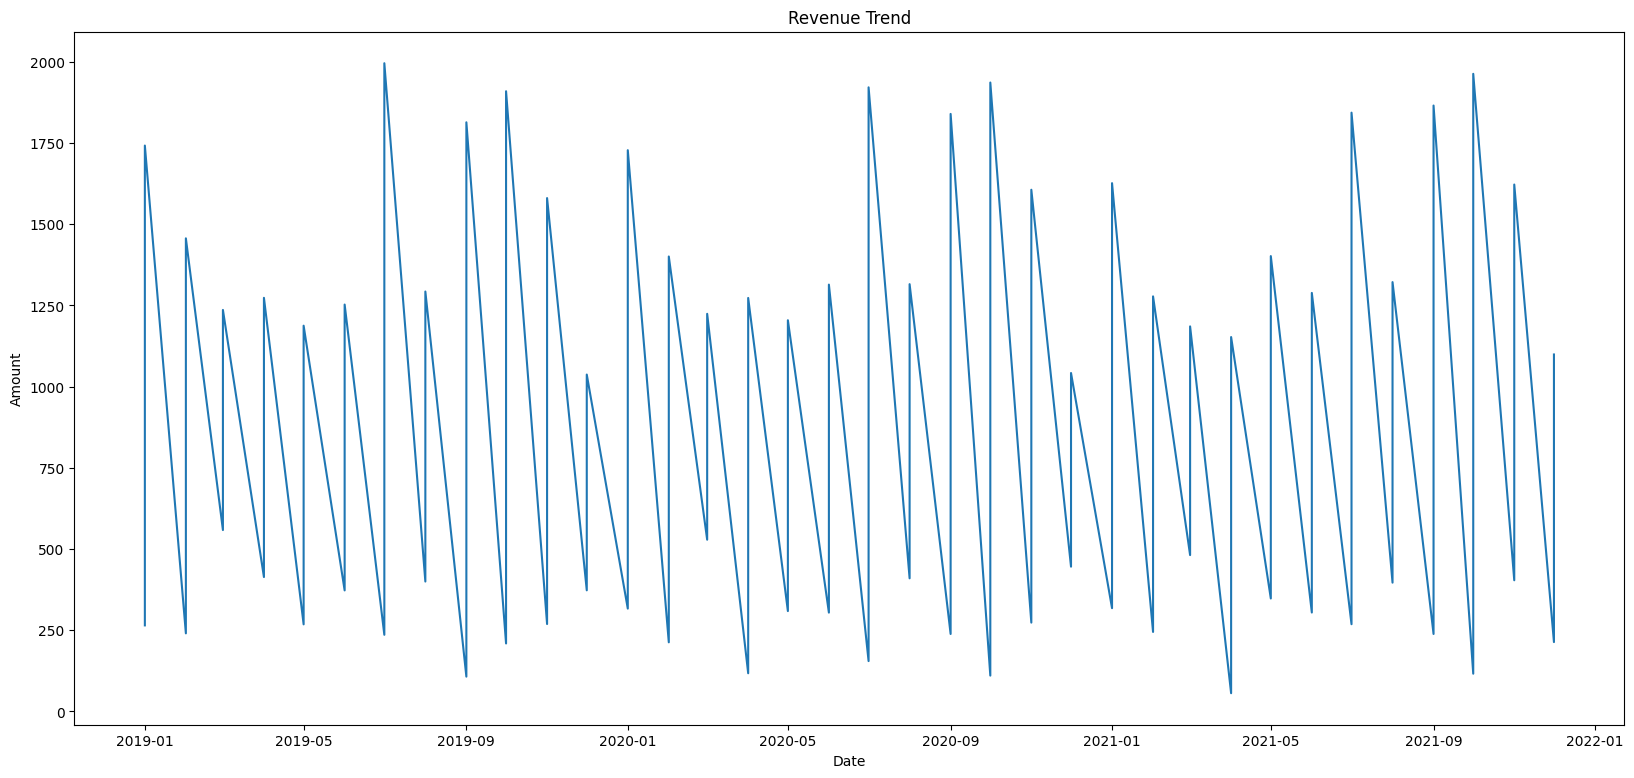

In [33]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date",y="Amount",estimator = None,data=df[df["Account Description"]=="Service Revenue"]).set_title("Revenue Trend")
plt.show()

# Correlation

In [34]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [35]:
df.select_dtypes(include=["float","int"]).corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [36]:
pd.get_dummies(df["Account"])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,False,False,False,False,False,False,False,False,True,False,False,False,False
4208,False,False,False,False,False,False,False,False,False,True,False,False,False
4209,False,False,False,False,False,False,False,False,False,False,True,False,False
4210,False,False,False,False,False,False,False,False,False,False,False,True,False


In [37]:
corrdict={}
for key,row in df.join(pd.get_dummies(df["Account"])).iterrows():
    corrdict[key] = {int(row["Account"]):row["Amount"]}

In [38]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [39]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


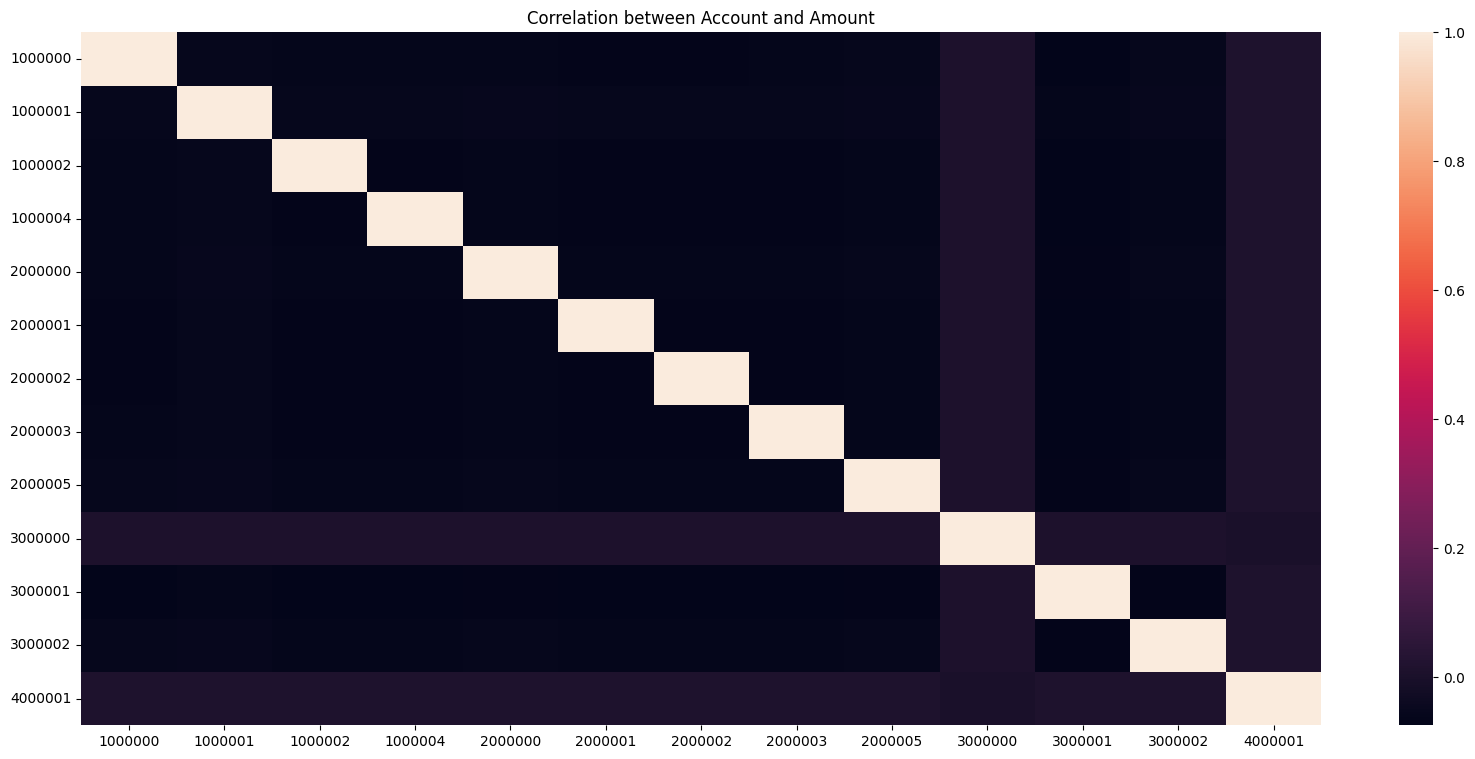

In [40]:
plt.figure(figsize=(20,9))
sns.heatmap(corrdf.corr()).set_title("Correlation between Account and Amount")
plt.show()

In [41]:
df[df["Account"] == 3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


# 3.Data Prep

In [42]:
import numpy as np

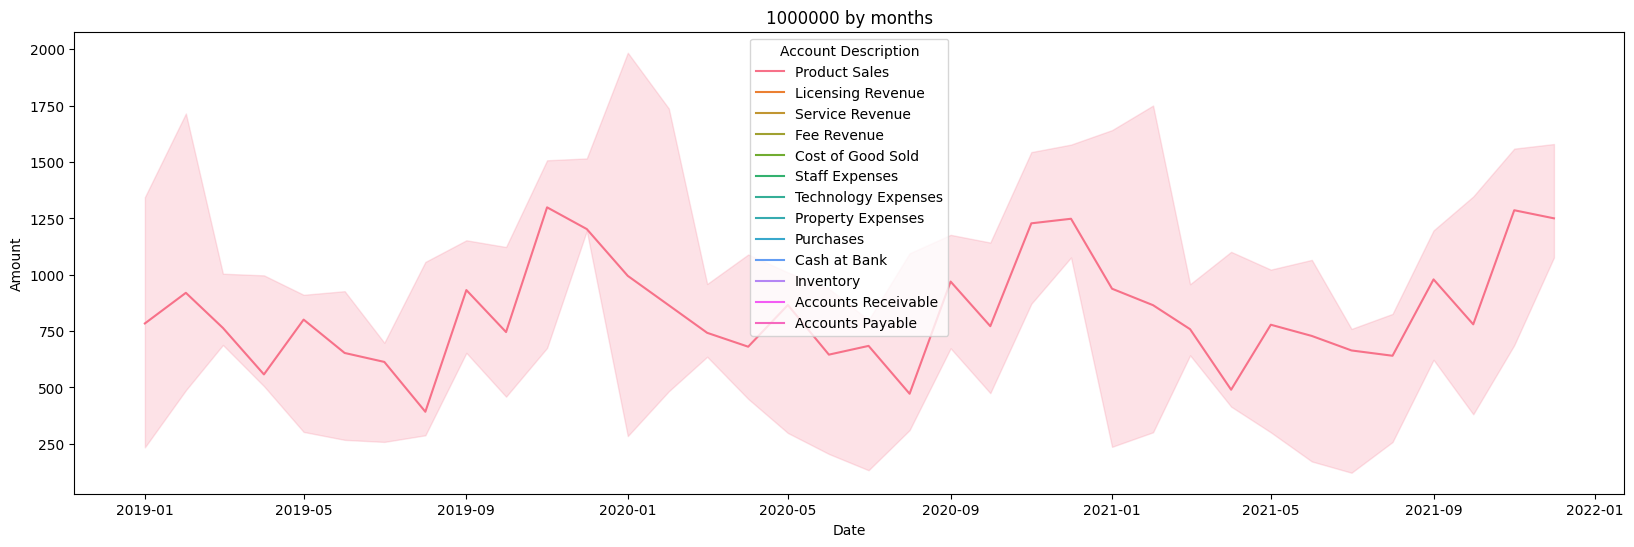

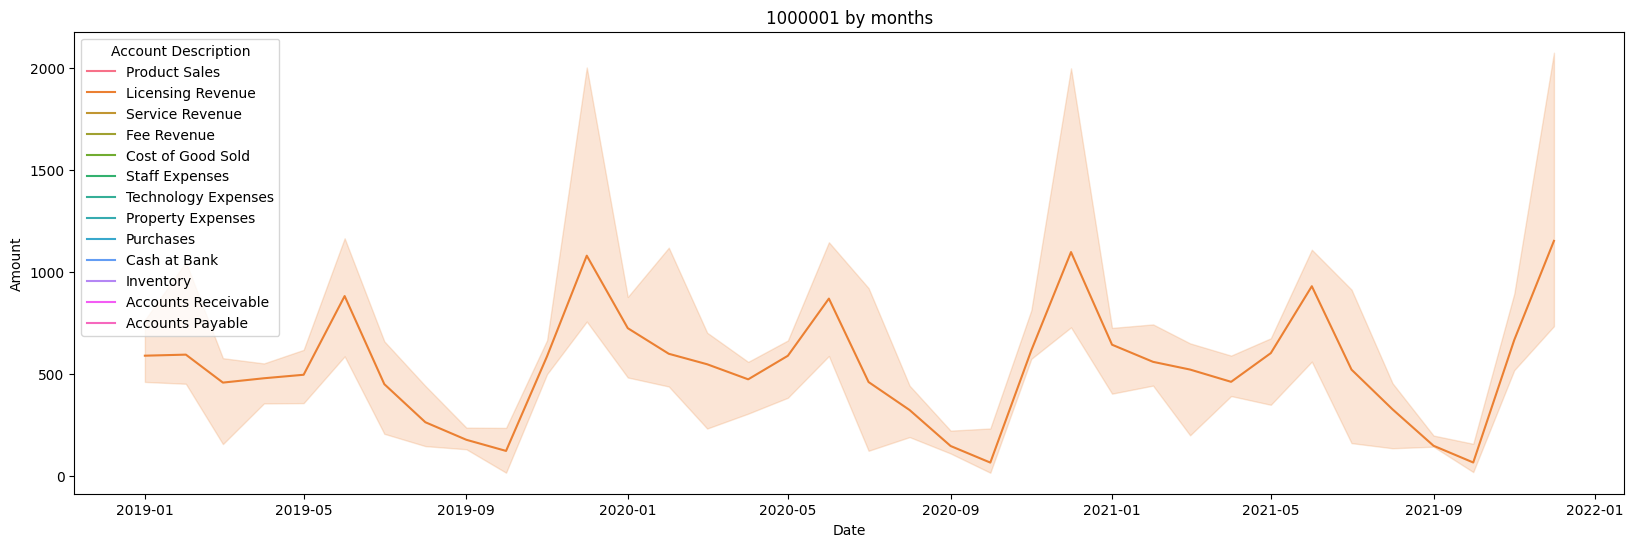

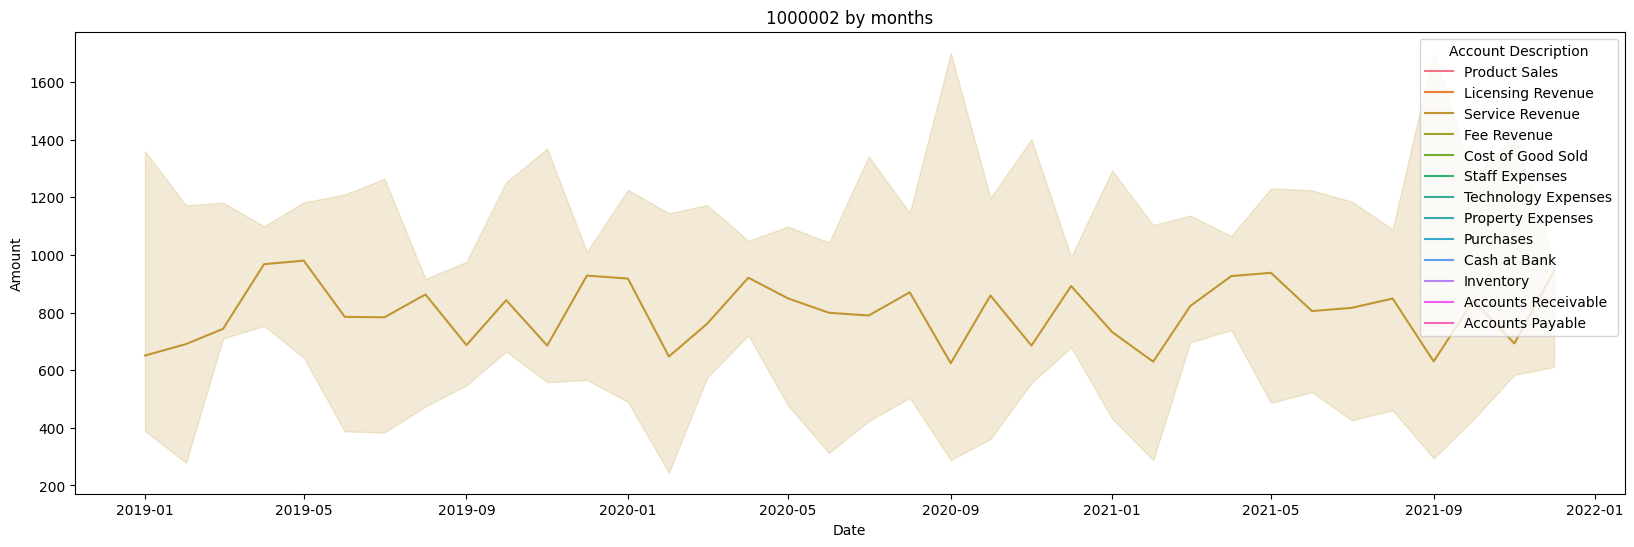

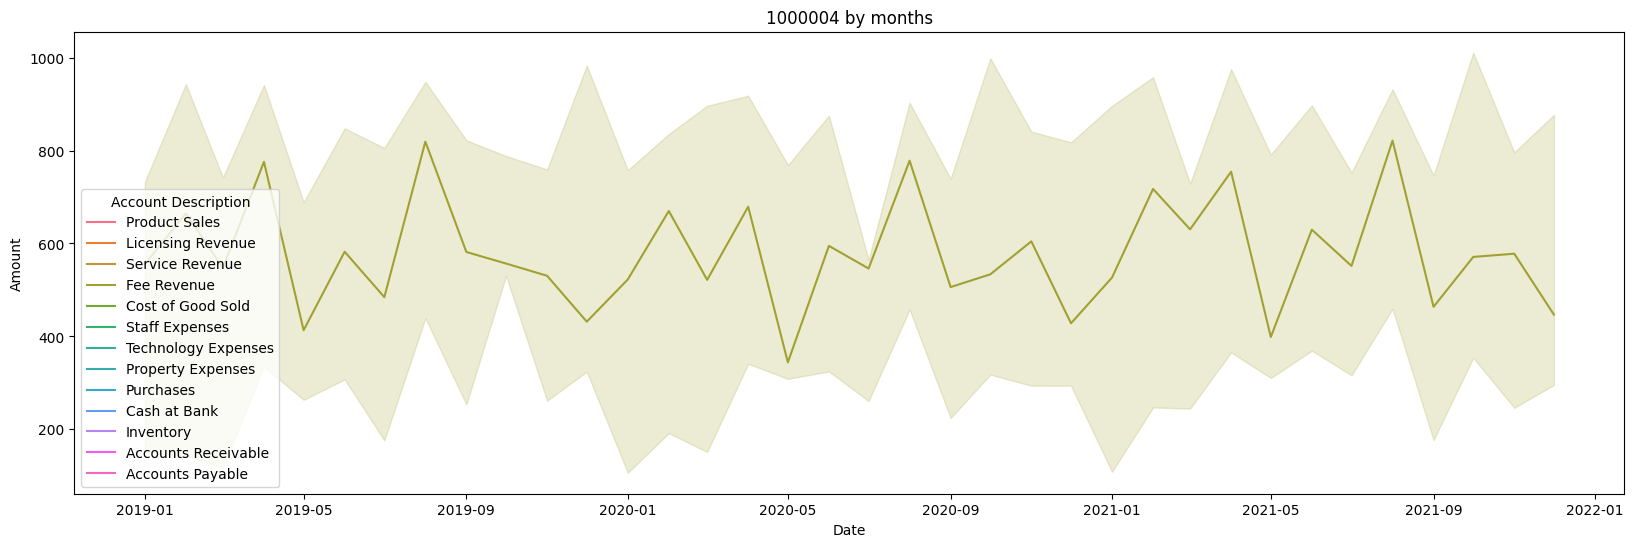

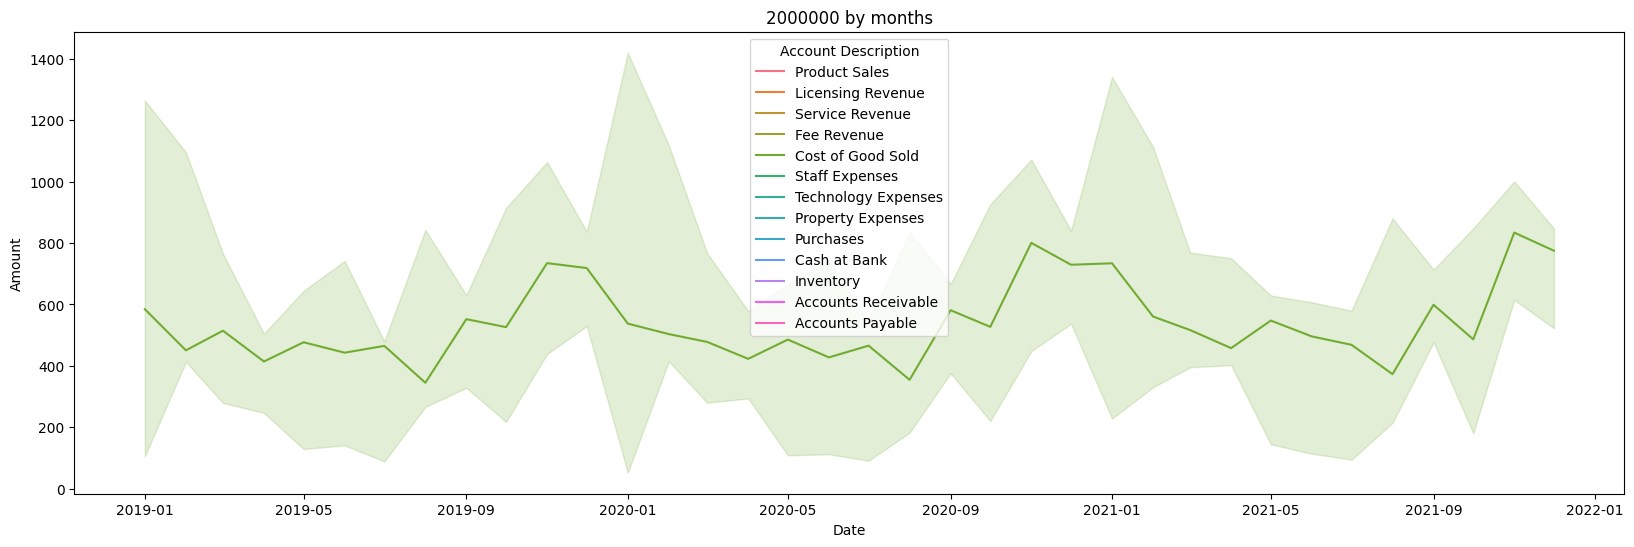

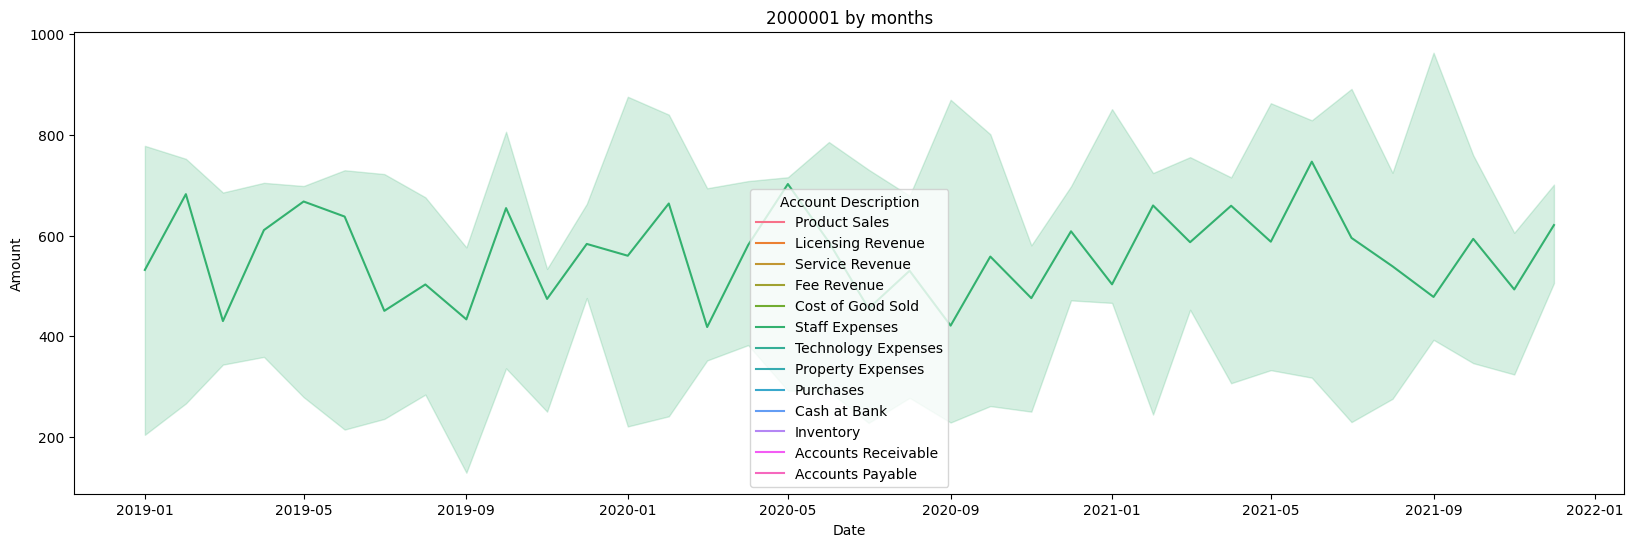

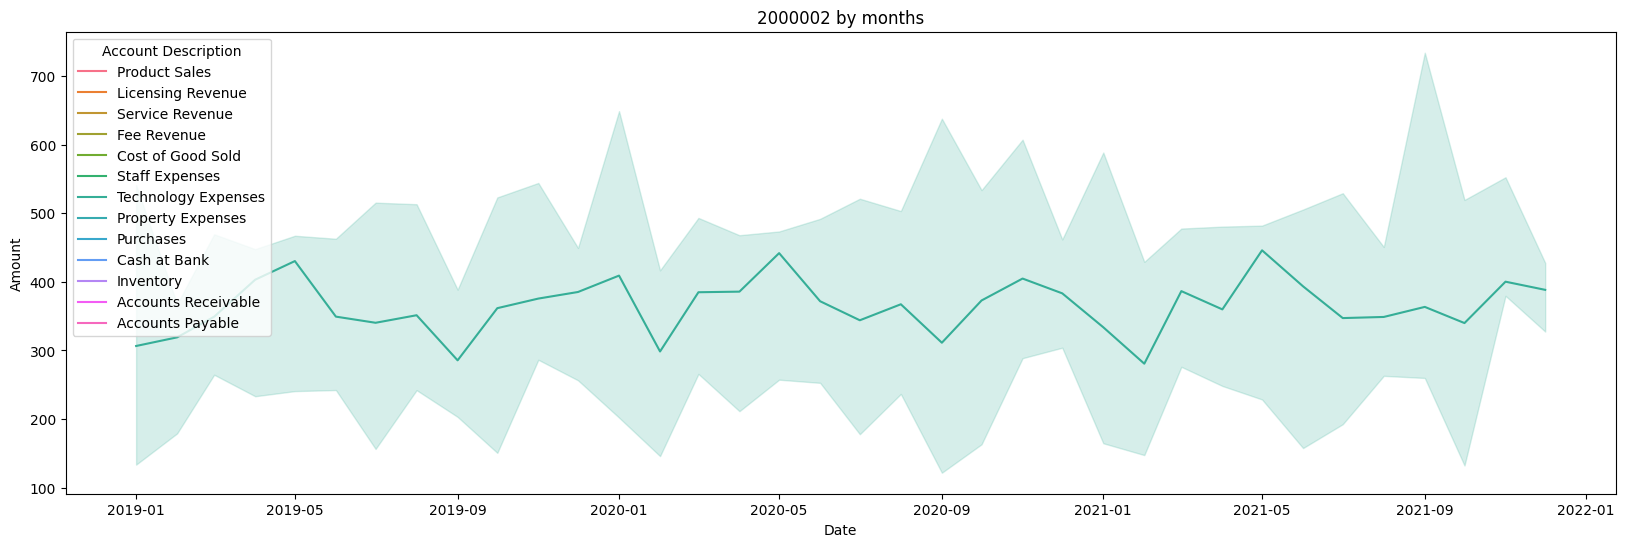

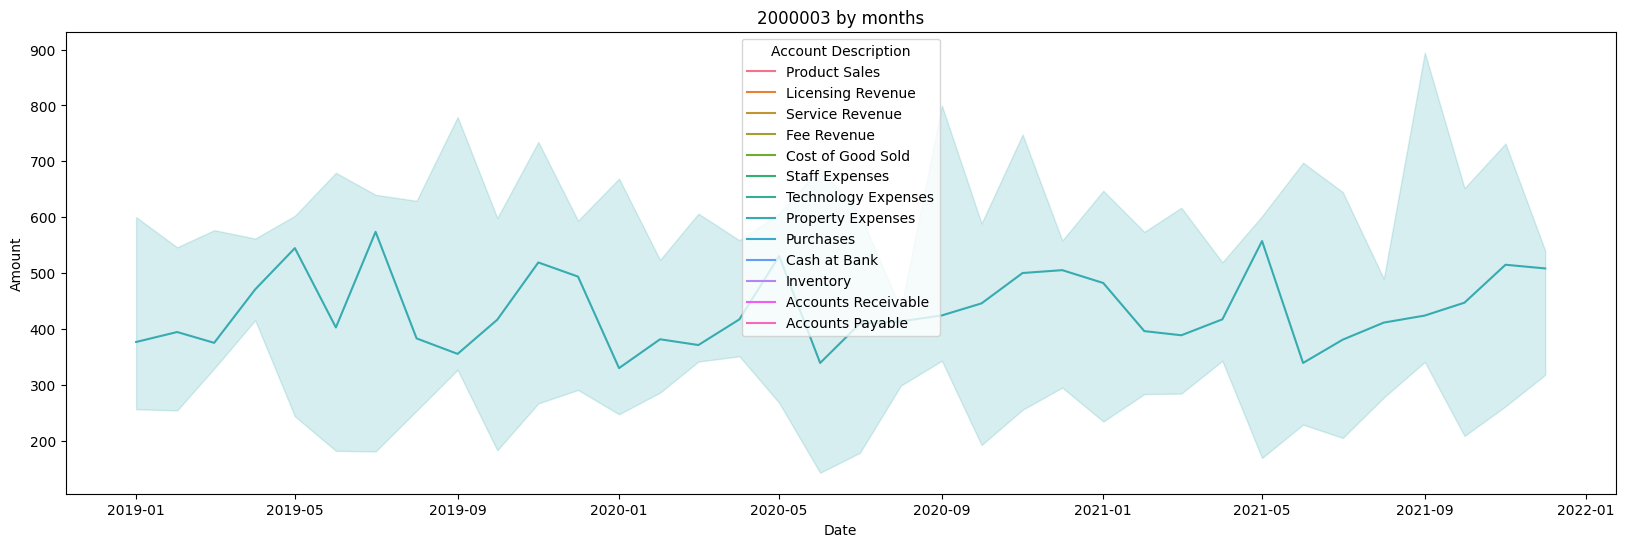

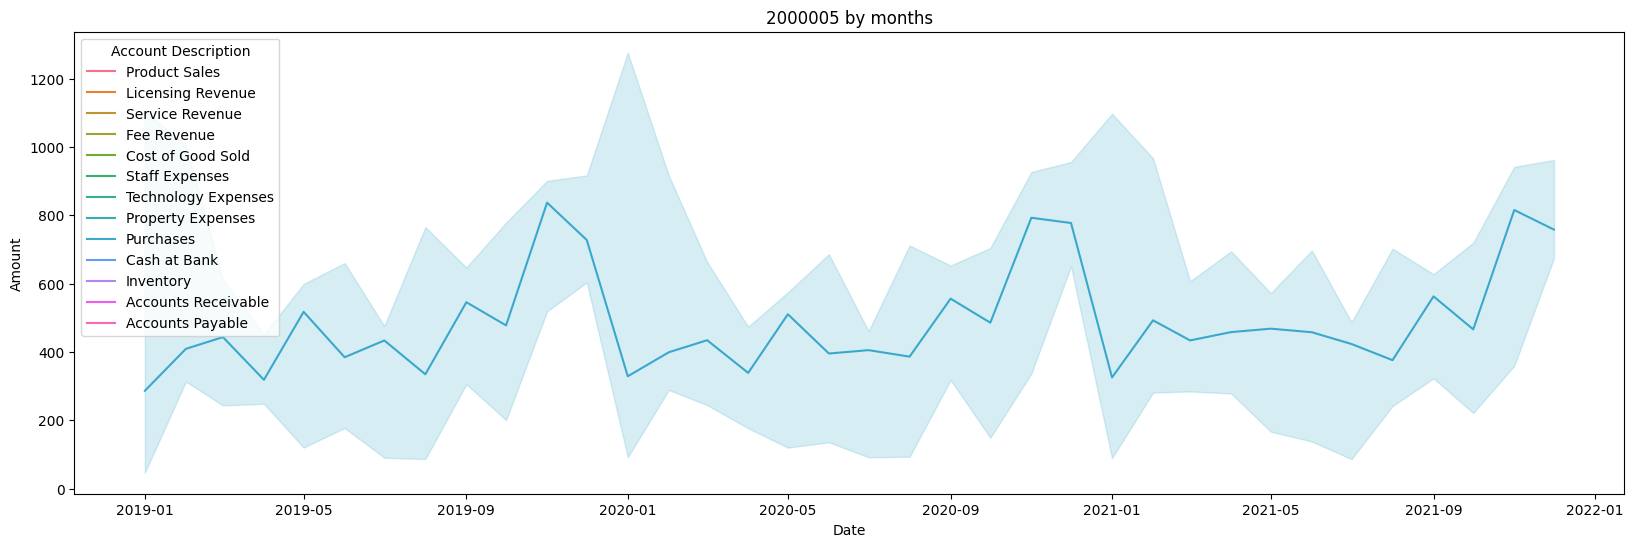

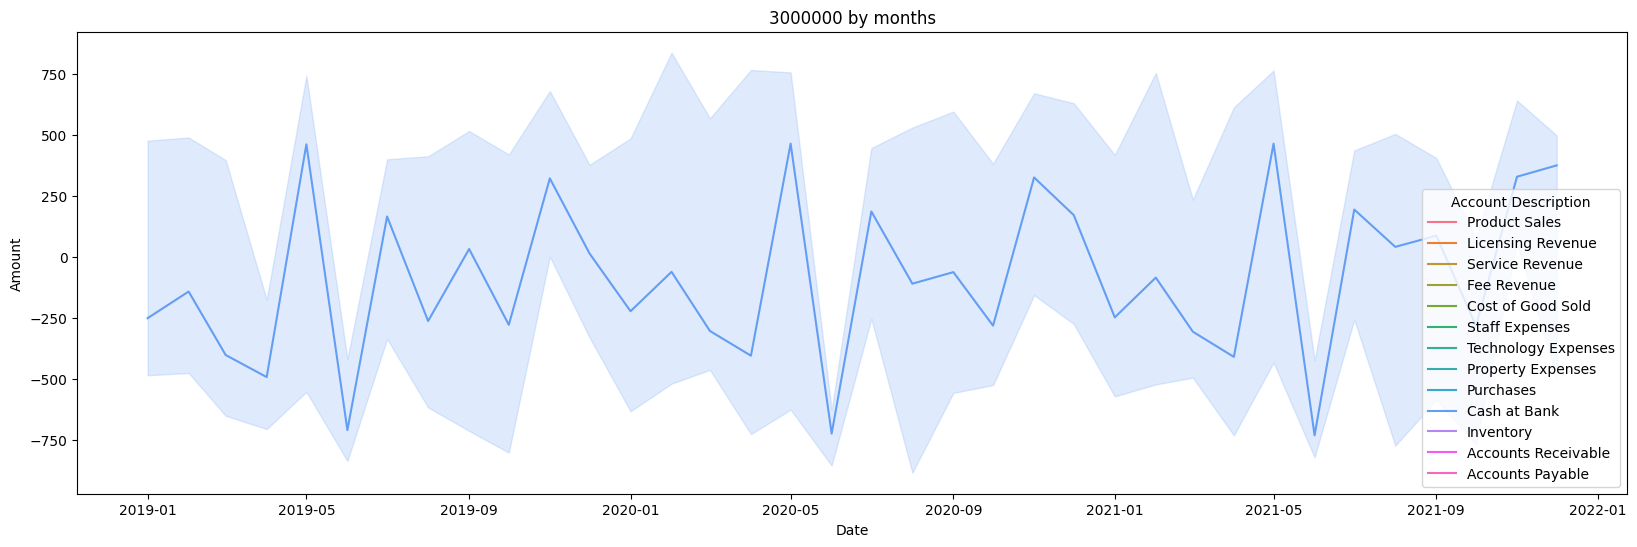

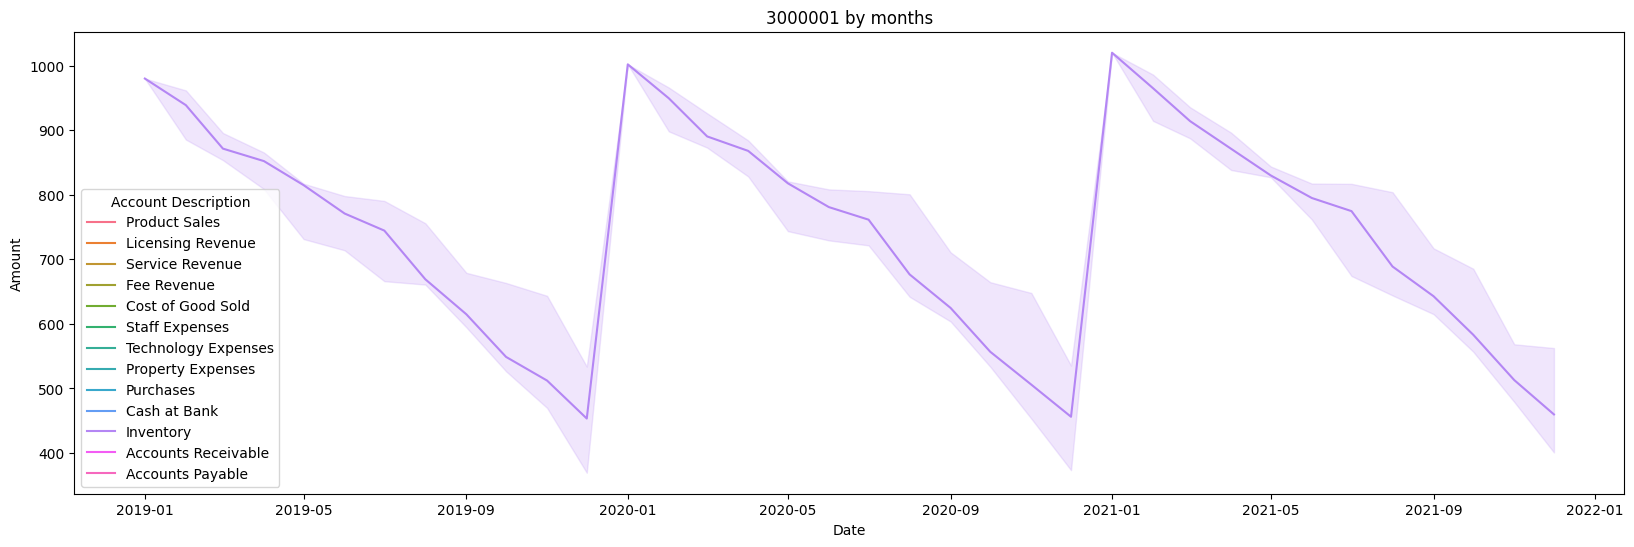

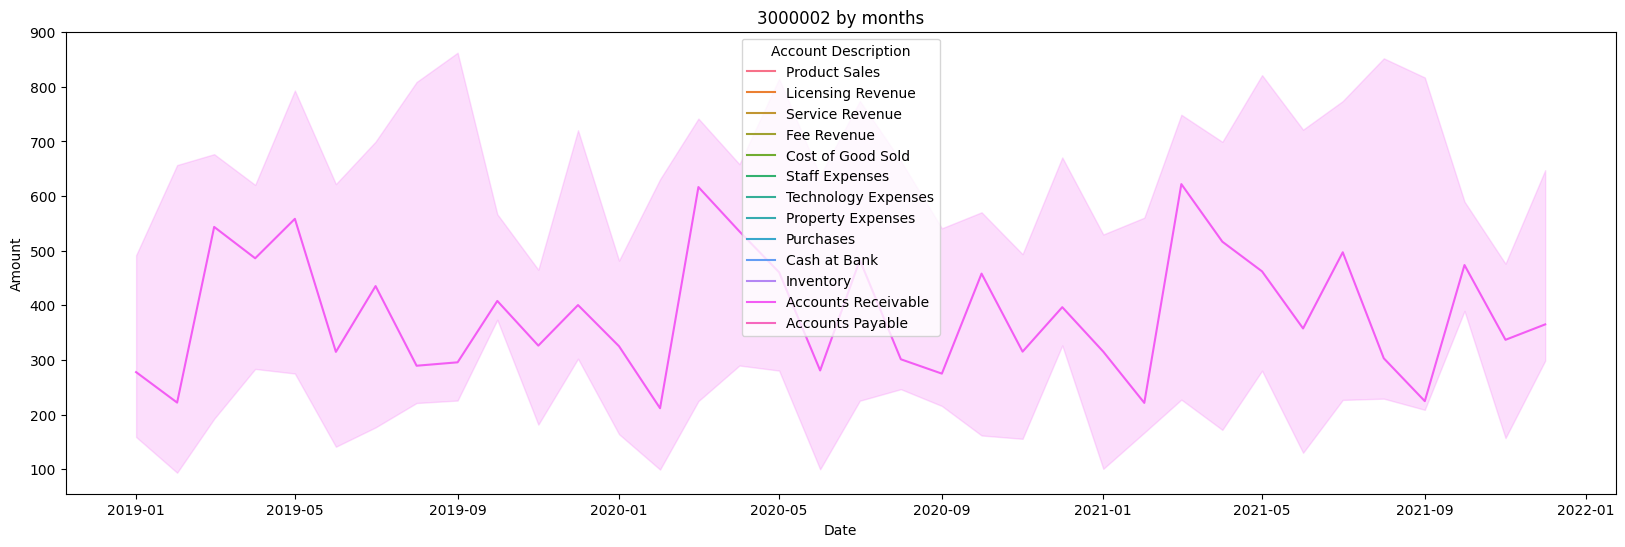

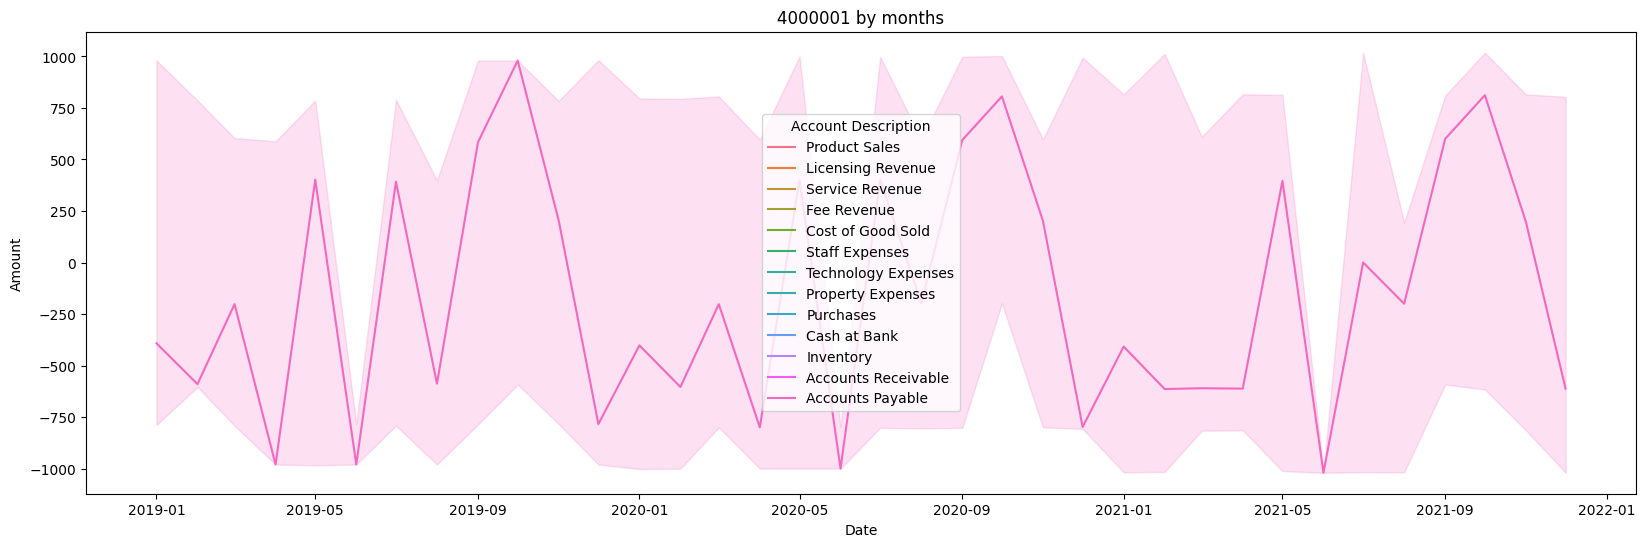

In [43]:
for account in df["Account"].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x="Date",y="Amount", estimator = np.median,hue=df["Account Description"],data=df[df["Account"]==account]).set_title("{} by months".format(account))
    plt.show()

In [44]:
#df= df[df["Account"]!=3000001]

In [45]:
df["Account"].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

In [46]:
df["Account"] = "acc" + df["Account"].astype(str)

In [47]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,acc1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,acc1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,acc1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,acc1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,acc2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [48]:
df["Year"] = df["Year"].astype(str)

In [49]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

# Drop Analysis Field

In [50]:
df.drop(["Period","Day","Date"], inplace = True, axis = 1)

In [51]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,acc1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,acc1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,acc1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,acc1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,acc2000000,Cost of Good Sold,Expense,1125.328


In [52]:
len(df["Account"].unique())

13

In [53]:
len(df["Account Description"].unique())

13

In [54]:
df["Account Val"] = df["Account"] + df["Account Description"]

In [55]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Account Val
0,2019,Jan,CC100,acc1000000,Product Sales,Revenue,1344.051,acc1000000Product Sales
1,2019,Jan,CC100,acc1000001,Licensing Revenue,Revenue,480.968,acc1000001Licensing Revenue
2,2019,Jan,CC100,acc1000002,Service Revenue,Revenue,650.820,acc1000002Service Revenue
3,2019,Jan,CC100,acc1000004,Fee Revenue,Revenue,339.360,acc1000004Fee Revenue
4,2019,Jan,CC100,acc2000000,Cost of Good Sold,Expense,1125.328,acc2000000Cost of Good Sold


In [56]:
len(df["Account Val"].unique())

13

In [57]:
df.drop(["Account","Account Description"],inplace =True, axis = 1)

In [58]:
df.head()

,Year,Month,Cost Centre,Account Type,Amount,Account Val
0,2019,Jan,CC100,Revenue,1344.051,acc1000000Product Sales
1,2019,Jan,CC100,Revenue,480.968,acc1000001Licensing Revenue
2,2019,Jan,CC100,Revenue,650.820,acc1000002Service Revenue
3,2019,Jan,CC100,Revenue,339.360,acc1000004Fee Revenue
4,2019,Jan,CC100,Expense,1125.328,acc2000000Cost of Good Sold


In [59]:
df = pd.get_dummies(df)

In [60]:
df = df.applymap(lambda x: 1 if x is True else( 0 if x is False else x))

In [61]:
df

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account Val_acc1000004Fee Revenue,Account Val_acc2000000Cost of Good Sold,Account Val_acc2000001Staff Expenses,Account Val_acc2000002Technology Expenses,Account Val_acc2000003Property Expenses,Account Val_acc2000005Purchases,Account Val_acc3000000Cash at Bank,Account Val_acc3000001Inventory,Account Val_acc3000002Accounts Receivable,Account Val_acc4000001Accounts Payable
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,339.360,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4209,537.478,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# 4.Modelling

In [62]:
x = df.drop(["Amount"], axis = 1)
y = df["Amount"]

In [63]:
x.columns

Index(['Year_2019', 'Year_2020', 'Year_2021', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Cost Centre_CC100', 'Cost Centre_CC101', 'Cost Centre_CC102',
       'Cost Centre_CC200', 'Cost Centre_CC201', 'Cost Centre_CC202',
       'Cost Centre_CC300', 'Cost Centre_CC301', 'Cost Centre_CC302',
       'Account Type_Asset', 'Account Type_Expense', 'Account Type_Liability',
       'Account Type_Revenue', 'Account Val_acc1000000Product Sales',
       'Account Val_acc1000001Licensing Revenue',
       'Account Val_acc1000002Service Revenue',
       'Account Val_acc1000004Fee Revenue',
       'Account Val_acc2000000Cost of Good Sold',
       'Account Val_acc2000001Staff Expenses',
       'Account Val_acc2000002Technology Expenses',
       'Account Val_acc2000003Property Expenses',
       'Account Val_acc2000005Purchases', 'Account Val_acc3000000Cash at Bank',
    

In [64]:
y

0       1344.051
1        480.968
2        650.820
3        339.360
4       1125.328
          ...   
4207     698.121
4208    -282.056
4209     537.478
4210    1152.680
4211   -1020.000
Name: Amount, Length: 4212, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3,random_state = 1234)

In [67]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2948, 41) (1264, 41) (2948,) (1264,)


# Import Dependencies

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [69]:
pipelines = {
    "rf": make_pipeline(RandomForestRegressor(random_state= 42)),
    "gb": make_pipeline(GradientBoostingRegressor(random_state= 42)),
    "ridge": make_pipeline(Ridge(random_state= 42)),
    "lasso": make_pipeline(Lasso(random_state= 42)),
    "enet": make_pipeline(ElasticNet(random_state= 42))
}

# hyperparameter grid

In [70]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [72]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [73]:
hypergrid = {
    "rf":{   
        'randomforestregressor__min_samples_split': [2,4,6],    
        'randomforestregressor__min_samples_leaf': [1,2,3]
                },
    "gb":{ 
            "gradientboostingregressor__alpha":[0.001,0.05,0.1,0.5,0.1,0.5,0.99]
    },
    "ridge":{
            "ridge__alpha":[0.001,0.05,0.1,0.5,0.1,0.5,0.99]
    },
    "lasso":{
            "lasso__alpha":[0.001,0.05,0.1,0.5,0.1,0.5,0.99]
    },
    "enet":{
            "elasticet__alpha":[0.001,0.05,0.1,0.5,0.1,0.5,0.99]
    }
}

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [75]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hypergrid[algo], cv =10 ,n_jobs=-1)
    try:
        print("Starting Training for {}".format(algo))
        model.fit(x_train,y_train)
        fit_models[algo] = model
        print("Sucessfully fitted for {}".format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting Training for rf
Sucessfully fitted for rf
Starting Training for gb
Sucessfully fitted for gb
Starting Training for ridge
Sucessfully fitted for ridge
Starting Training for lasso
Sucessfully fitted for lasso
Starting Training for enet


ValueError: Invalid parameter 'elasticet' for estimator Pipeline(steps=[('elasticnet', ElasticNet(random_state=42))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [76]:
fit_models["rf"].predict(x_test)

array([ 547.5146 ,  540.72803,  448.9461 , ..., -509.86   ,  628.83581,
       1102.07784])

# 5.Evaluation

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error

In [78]:
for algo,model in fit_models.items():
    yhat = model.predict(x_test)
    print("{} Score - r2_Score {} , Mean Absolute Error {}".format(algo,r2_score(y_test,yhat),mean_absolute_error(y_test,yhat)))

rf Score - r2_Score 0.924547269634582 , Mean Absolute Error 79.9328596202532
gb Score - r2_Score 0.6353516501682552 , Mean Absolute Error 190.84195092039042
ridge Score - r2_Score 0.5093625023110634 , Mean Absolute Error 224.8870632810303
lasso Score - r2_Score 0.5097562683939136 , Mean Absolute Error 224.4759973503193


In [79]:
best_model = fit_models["rf"]

# 6.Deployment

In [80]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [81]:
wml_credentials = {
    "apikey" : "6ZEpWDNHNQwAmPSgQhkFgTSZOLMBTA6xOR6ltRVGosWn",
        "url" : "https://us-south.ml.cloud.ibm.com"
}

In [82]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
cf987f14-eb5b-4a06-b881-f1b9363690b3  Prod  2025-06-14T05:07:17.781Z
3b0fe372-17fb-43c5-af07-78b6359104f4  PROD  2025-06-13T16:02:05.060Z
------------------------------------  ----  ------------------------


,ID,NAME,CREATED
0,cf987f14-eb5b-4a06-b881-f1b9363690b3,Prod,2025-06-14T05:07:17.781Z
1,3b0fe372-17fb-43c5-af07-78b6359104f4,PROD,2025-06-13T16:02:05.060Z


In [83]:
SPACE_ID = "3b0fe372-17fb-43c5-af07-78b6359104f4"

In [84]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [85]:
MODEL_NAME = "Sklearn Forecast"
DEPLOYMENT_NAME = "Sklearn Deployment"
BEST_MODEL = best_model

In [86]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-24.1-py3.11")
model_props = {
    wml_client.repository.ModelMetaNames.NAME : MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE : "scikit-learn_1.3",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

model_details = wml_client.repository.store_model(
    model = BEST_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train,
    pipeline = pipelines["rf"] 
)

In [89]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Amount',
  'schemas': {'input': [{'fields': [{'name': 'Year_2019', 'type': 'int64'},
      {'name': 'Year_2020', 'type': 'int64'},
      {'name': 'Year_2021', 'type': 'int64'},
      {'name': 'Month_Apr', 'type': 'int64'},
      {'name': 'Month_Aug', 'type': 'int64'},
      {'name': 'Month_Dec', 'type': 'int64'},
      {'name': 'Month_Feb', 'type': 'int64'},
      {'name': 'Month_Jan', 'type': 'int64'},
      {'name': 'Month_Jul', 'type': 'int64'},
      {'name': 'Month_Jun', 'type': 'int64'},
      {'name': 'Month_Mar', 'type': 'int64'},
      {'name': 'Month_May', 'type': 'int64'},
      {'name': 'Month_Nov', 'type': 'int64'},
      {'name': 'Month_Oct', 'type': 'int64'},
      {'name': 'Month_Sep', 'type': 'int64'},
      {'name': 'Cost Centre_CC100', 'type': 'int64'},
      {'name': 'Cost Centre_CC101', 'type': 'int64'},
      {'name': 'Cost Centre_CC102', 'type': 'int64'},
      {'name': 'Cost Centre_CC200', 'typ

In [90]:
model_uid = wml_client.repository.get_model_id(model_details);model_uid

'34493a40-fd41-4d50-8baf-71f0c52b4d2e'

In [94]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

deployment = wml_client.deployments.create(
    artifact_uid = model_uid,
    meta_props = deployment_props
)

deployment



#######################################################################################

Synchronous deployment creation for uid: '34493a40-fd41-4d50-8baf-71f0c52b4d2e' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e3ccb4a6-6739-4f7e-87ad-aaf81505c87e'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '34493a40-fd41-4d50-8baf-71f0c52b4d2e'},
  'chat_enabled': False,
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Sklearn Deployment',
  'online': {},
  'space_id': '3b0fe372-17fb-43c5-af07-78b6359104f4',
  'status': {'inference': [{'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'}],
   'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2025-06-14T05:22:51.875Z',
  'id': 'e3ccb4a6-6739-4f7e-87ad-aaf81505c87e',
  'modified_at': '2025-06-14T05:22:51.875Z',
  'name': 'Sklearn Deployment',
  'owner': 'IBMid-696000YG4T',
  'space_id': '3b0fe3

In [95]:
deployment_uid = wml_client.deployments.get_uid(deployment)
payload = {"input_data" : [{"fields": x_test.columns.to_numpy().tolist(), "values":x_test.to_numpy().tolist()}]}
result = wml_client.deployments.score(deployment_uid,payload); result

{'predictions': [{'fields': ['prediction'],
   'values': [[547.5146000000003],
    [540.7280300000001],
    [448.94610000000034],
    [353.52723999999995],
    [880.6583599999997],
    [713.4742999999996],
    [714.4842099999998],
    [219.82802000000004],
    [265.25615999999974],
    [518.0153700000002],
    [185.09627000000012],
    [1408.7426899999984],
    [585.6234299999999],
    [901.8652000000001],
    [489.6004700000005],
    [596.98],
    [518.9114199999999],
    [418.5975799999998],
    [423.41571000000033],
    [527.1834599999995],
    [418.01525000000004],
    [576.4418299999994],
    [55.21751999999994],
    [430.69469999999995],
    [80.26036999999997],
    [640.86303],
    [-262.74752000000024],
    [330.24099000000007],
    [251.36969999999985],
    [-301.5390399999997],
    [380.54],
    [430.95150999999976],
    [949.2451499999994],
    [700.53409],
    [4.201469999999989],
    [973.7459300000005],
    [-724.6698199999996],
    [602.7905899999998],
    [581.447650000

In [96]:
pred_values = np.squeeze(result["predictions"][0]["values"]); pred_values
preddf = x_test.join(y_test)
preddf["Scores"] = pred_values
preddf.head()

,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Account Val_acc2000001Staff Expenses,Account Val_acc2000002Technology Expenses,Account Val_acc2000003Property Expenses,Account Val_acc2000005Purchases,Account Val_acc3000000Cash at Bank,Account Val_acc3000001Inventory,Account Val_acc3000002Accounts Receivable,Account Val_acc4000001Accounts Payable,Amount,Scores
4050,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,514.924,547.51460
3576,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,699.906,540.72803
292,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,453.516,448.94610
1864,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,492.930,353.52724
2055,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,998.773,880.65836


In [97]:
preddf.to_csv("results.csv")

In [98]:
deployment = wml_client.deployments.get_details(deployment_uid)
scoring_url = deployment["entity"]["status"]["online_url"]["url"]

Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.


In [99]:
WML_SCORING_URL = scoring_url

In [100]:
WML_SCORING_URL

'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'

In [101]:
deployment

{'entity': {'asset': {'id': '34493a40-fd41-4d50-8baf-71f0c52b4d2e'},
  'chat_enabled': False,
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Sklearn Deployment',
  'online': {},
  'space_id': '3b0fe372-17fb-43c5-af07-78b6359104f4',
  'status': {'inference': [{'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'}],
   'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2025-06-14T05:22:51.875Z',
  'id': 'e3ccb4a6-6739-4f7e-87ad-aaf81505c87e',
  'modified_at': '2025-06-14T05:22:51.875Z',
  'name': 'Sklearn Deployment',
  'owner': 'IBMid-696000YG4T',
  'space_id': '3b0fe3

In [102]:
x_test.iloc[0].to_numpy().tolist()

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [103]:
x_test.columns.to_numpy().tolist()

['Year_2019',
 'Year_2020',
 'Year_2021',
 'Month_Apr',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Cost Centre_CC100',
 'Cost Centre_CC101',
 'Cost Centre_CC102',
 'Cost Centre_CC200',
 'Cost Centre_CC201',
 'Cost Centre_CC202',
 'Cost Centre_CC300',
 'Cost Centre_CC301',
 'Cost Centre_CC302',
 'Account Type_Asset',
 'Account Type_Expense',
 'Account Type_Liability',
 'Account Type_Revenue',
 'Account Val_acc1000000Product Sales',
 'Account Val_acc1000001Licensing Revenue',
 'Account Val_acc1000002Service Revenue',
 'Account Val_acc1000004Fee Revenue',
 'Account Val_acc2000000Cost of Good Sold',
 'Account Val_acc2000001Staff Expenses',
 'Account Val_acc2000002Technology Expenses',
 'Account Val_acc2000003Property Expenses',
 'Account Val_acc2000005Purchases',
 'Account Val_acc3000000Cash at Bank',
 'Account Val_acc3000001Inventory',
 'Account Val_acc3000002Accounts Receivabl

In [104]:
# ✅ Scoring URL
scoring_url = deployment['entity']['status']['inference'][0]['url']

# ✅ Created At
created_at = deployment['metadata']['created_at']

# ✅ Modified At
modified_at = deployment['metadata']['modified_at']

# ✅ Deployment Name
name = deployment['metadata']['name']

print(f"Name: {name}")
print(f"Scoring URL: {scoring_url}")
print(f"Created: {created_at}")
print(f"Modified: {modified_at}")

Name: Sklearn Deployment
Scoring URL: https://us-south.ml.cloud.ibm.com/ml/v4/deployments/e3ccb4a6-6739-4f7e-87ad-aaf81505c87e/predictions
Created: 2025-06-14T05:22:51.875Z
Modified: 2025-06-14T05:22:51.875Z
